In [1]:
import ehrapy.api as ep
import sc_toolbox.api as sct
import os

Unable to contact PyPI to check for the latest ehrapy version. Do you have an internet 
connection?

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/medcat/cat.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
ep.settings.set_figure_params(dpi=150)

# Fetching the MIMIC II dataset already encoded

In [3]:
encoded_mimic_2 = ep.dt.mimic_2(encode=True)

In [4]:
encoded_mimic_2

AnnData object with n_obs × n_vars = 1776 × 46
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals', 'original_values_categoricals', 'current_encodings'
    layers: 'original'

In [5]:
ep.ec.type_overview(encoded_mimic_2)

Variable names for AnnData object with 46 vars and 1776 obs                                  
╠══ Obs                                                                                      
║   ╠══ service_unit 🔐; 3 different categories; currently one hot encoded                   
║   ╚══ day_icu_intime 🔐; 7 different categories; currently one hot encoded                 
╚══ 🔓 Unencoded variables                                                                   
    ╠══ aline_flg                                                                            
    ╠══ icu_los_day                                                                          
    ╠══ hospital_los_day                                                                     
    ╠══ age                                                                                  
    ╠══ gender_num                                                                           
    ╠══ weight_first                                                                         
    ╠══ bmi                                                                                  
    ╠══ sapsi_first                                                                          
    ╠══ sofa_first                                                                           
    ╠══ service_num                                                                          
    ╠══ day_icu_intime_num                                                                   
    ╠══ hour_icu_intime                                                                      
    ╠══ hosp_exp_flg                                                                         
    ╠══ icu_exp_flg                                                                          
    ╠══ day_28_flg                                                                           
    ╠══ mort_day_censored                                                                    
    ╠══ censor_flg                                                                           
    ╠══ sepsis_flg                                                                           
    ╠══ chf_flg                                                                              
    ╠══ afib_flg                                                                             
    ╠══ renal_flg                                                                            
    ╠══ liver_flg                                                                            
    ╠══ copd_flg                                                                             
    ╠══ cad_flg                                                                              
    ╠══ stroke_flg                                                                           
    ╠══ mal_flg                                                                              
    ╠══ resp_flg                                                                             
    ╠══ map_1st                                                                              
    ╠══ hr_1st                                                                               
    ╠══ temp_1st                                                                             
    ╠══ spo2_1st                                                                             
    ╠══ abg_count                                                                            
    ╠══ wbc_first                                                                            
    ╠══ hgb_first                                                                            
    ╠══ platelet_first                                                                       
    ╠══ sodium_first                                                                         
    ╠══ potassium_first                                                                      
    ╠══ tco2_first                                     

# Fetching the MIMIC II dataset and custom encoding it

In [6]:
custom_mimic_2 = ep.dt.mimic_2(encode=False)

In [7]:
custom_mimic_2 = ep.ec.encode(
    custom_mimic_2,
    encodings={
        "label_encoding": ["service_unit"],
        "count_encoding": ["day_icu_intime"],
    },
)

Output()

In [8]:
custom_mimic_2

AnnData object with n_obs × n_vars = 1776 × 46
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals_encoded_with_mode', 'original_values_categoricals', 'current_encodings'
    layers: 'original'

In [9]:
custom_mimic_2.obs

,service_unit,day_icu_intime
0,SICU,Friday
1,MICU,Saturday
2,MICU,Friday
3,SICU,Saturday
4,SICU,Saturday
...,...,...
1771,MICU,Sunday
1772,SICU,Saturday
1773,MICU,Tuesday
1774,SICU,Wednesday


In [10]:
custom_mimic_2 = ep.ec.encode(
    custom_mimic_2, encodings={"one_hot_encoding": ["service_unit", "day_icu_intime"]}
)

Output()

In [11]:
custom_mimic_2

AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals_encoded_with_mode', 'original_values_categoricals', 'current_encodings'
    layers: 'original'

In [12]:
ep.io.write("mimic_2.h5ad", custom_mimic_2)

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'service_unit' as categorical
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'day_icu_intime' as categorical


In [13]:
adata = ep.io.read("mimic_2.h5ad")

In [14]:
adata

AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals_encoded_with_mode', 'current_encodings', 'original_values_categoricals'
    layers: 'original'

# Preprocess the data

The data still contains some nan values. They must be removed.

In [15]:
ep.pp.replace_explicit(adata, replacement=0)

/home/zeth/PycharmProjects/ehrapy/ehrapy/api/preprocessing/_data_imputation.py:41: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  impute_conditions = np.logical_or(pd.isnull(adata_to_act_on.X), adata_to_act_on.X == "")


AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals_encoded_with_mode', 'current_encodings', 'original_values_categoricals'
    layers: 'original'

# Calculate PCA & UMAP

In [16]:
ep.pp.pca(adata)

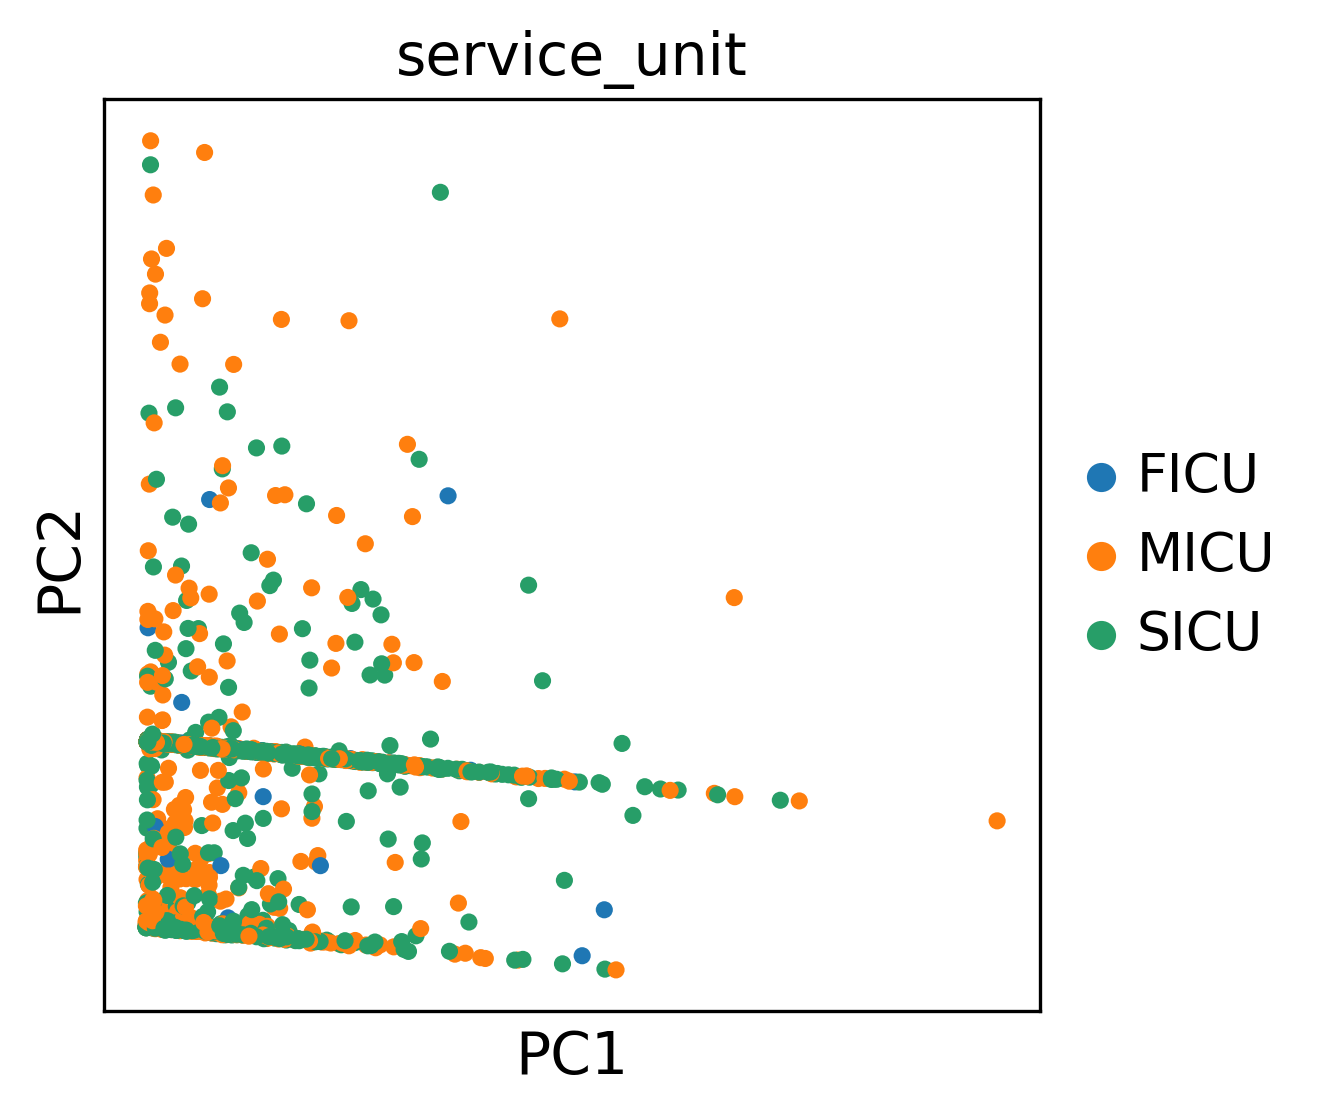

In [17]:
ep.pl.pca(adata, color="service_unit")

In [18]:
ep.pp.neighbors(adata)

In [19]:
ep.tl.umap(adata)

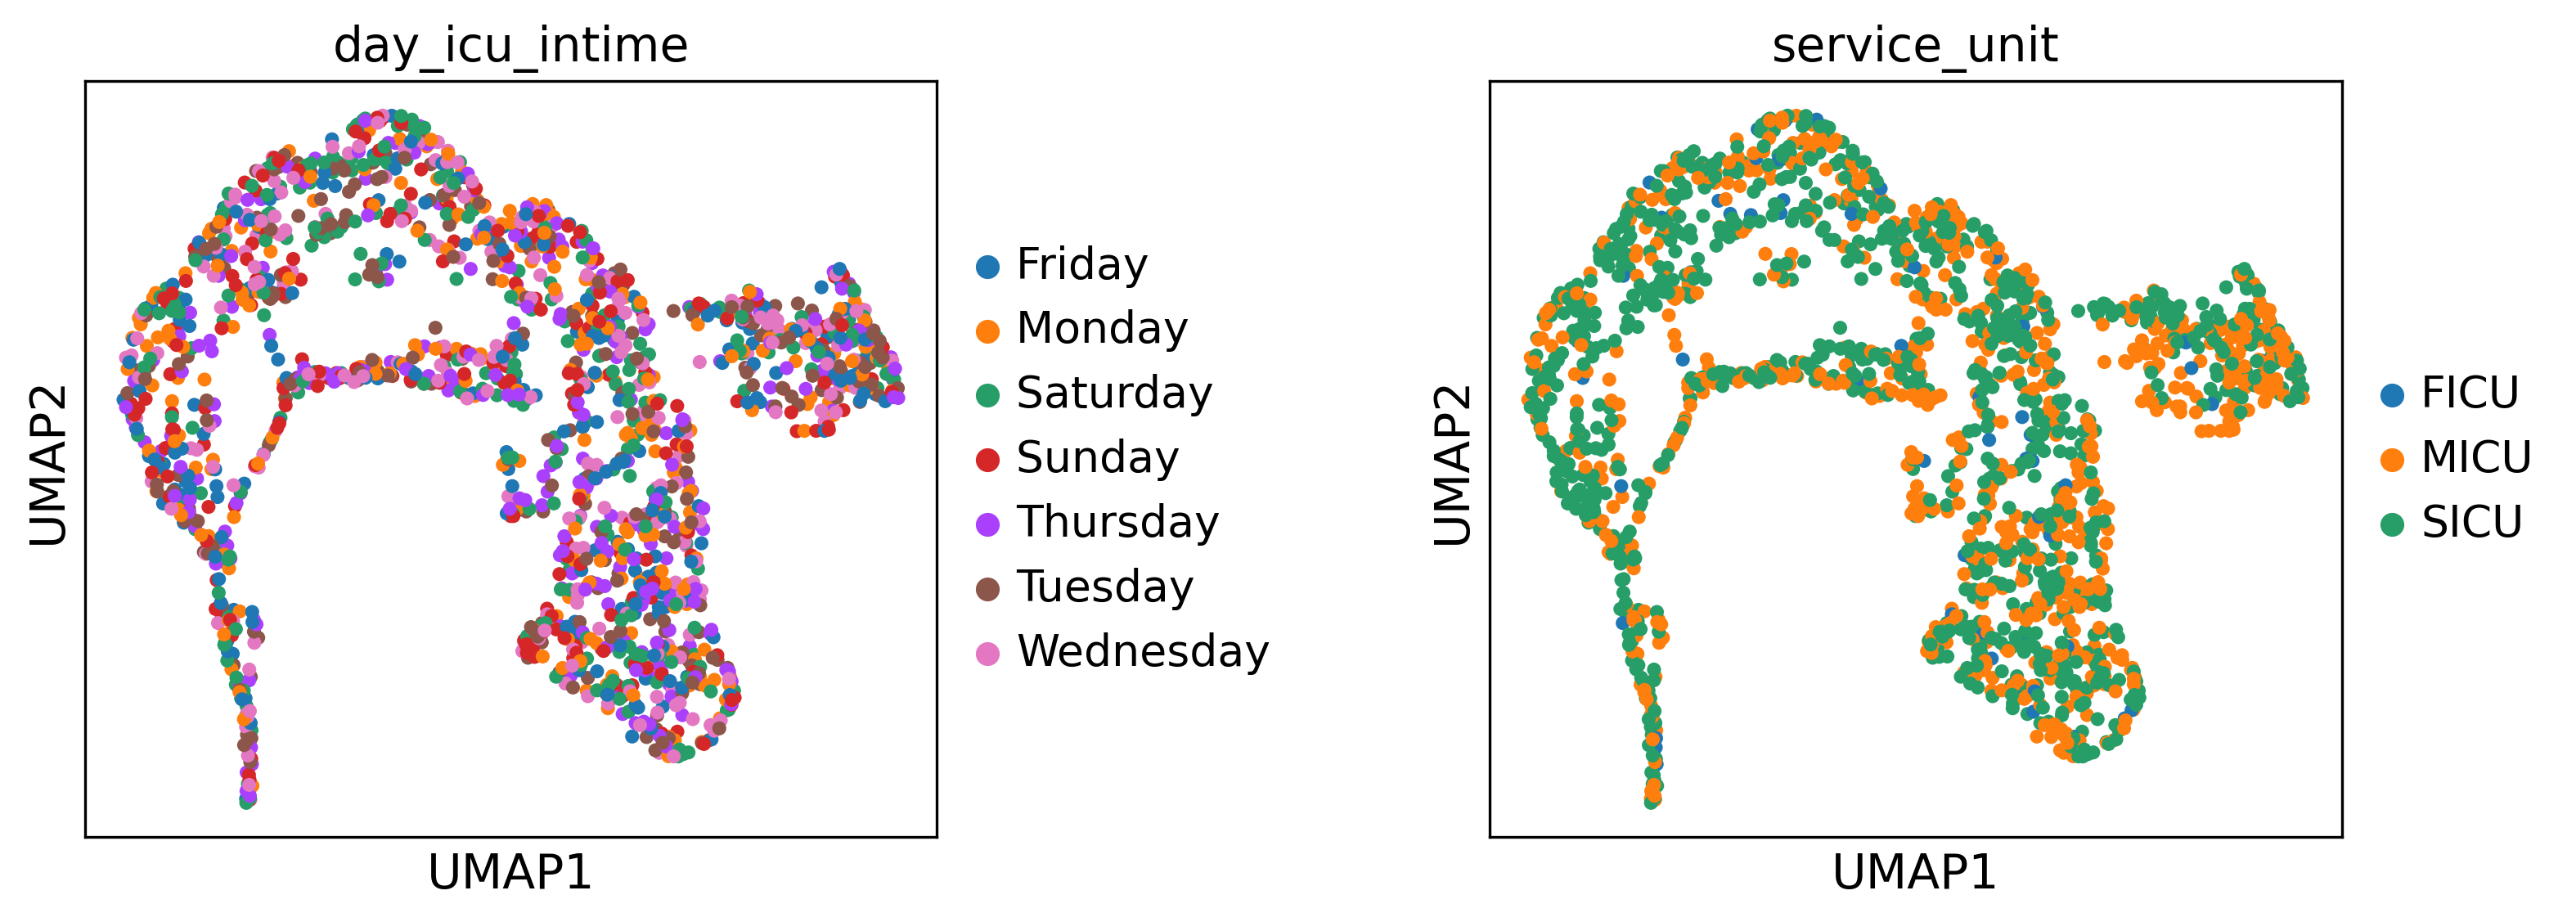

In [20]:
ep.pl.umap(adata, color=["day_icu_intime", "service_unit"], wspace=0.5)

In [21]:
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")

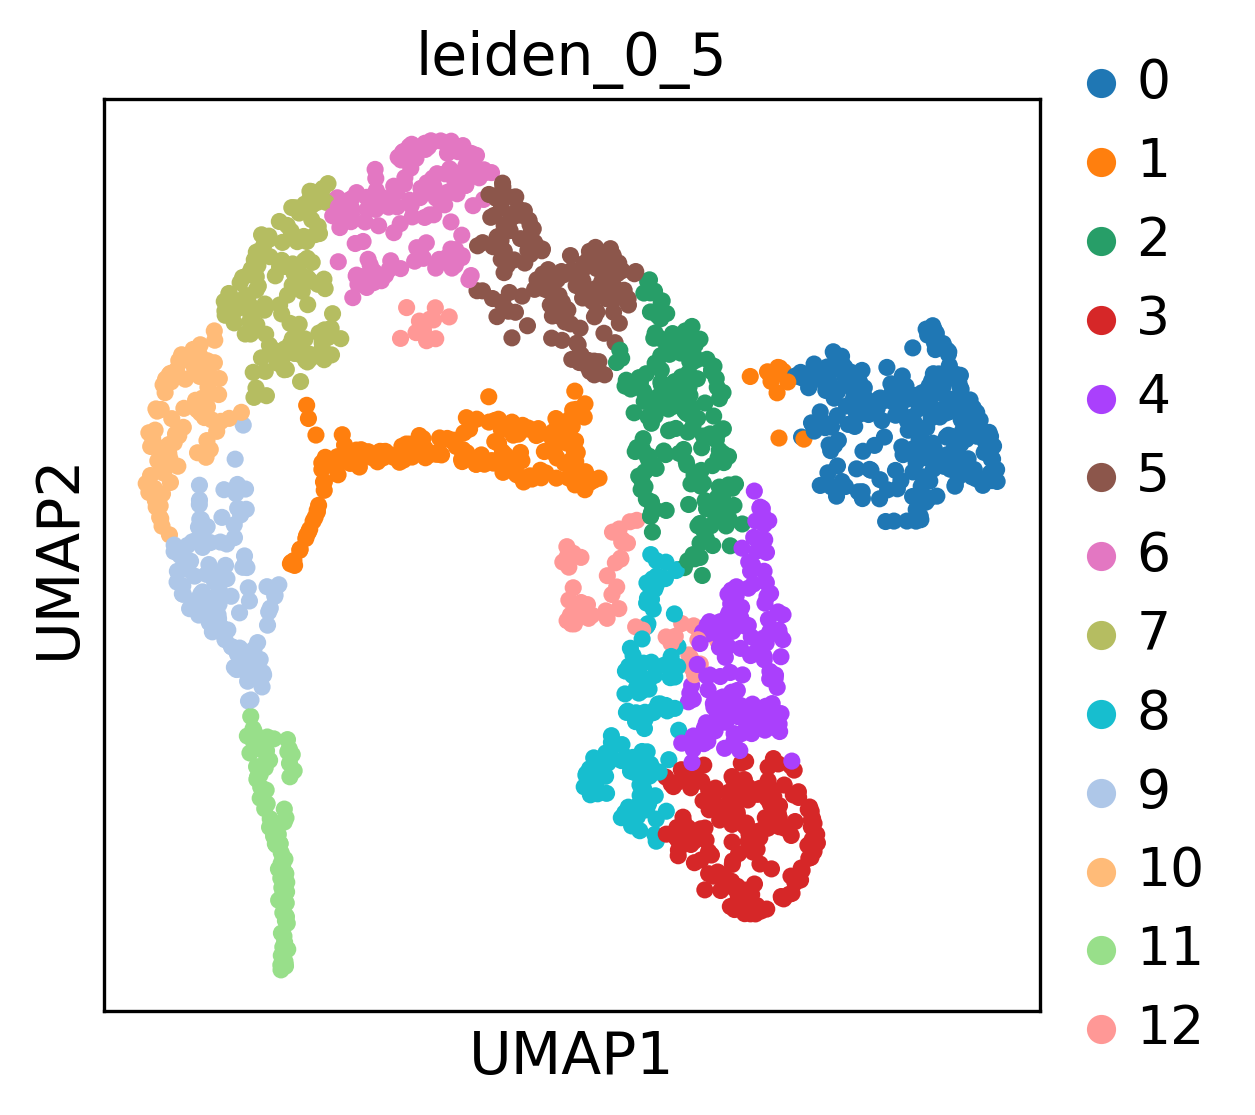

In [22]:
ep.pl.umap(adata, color=["leiden_0_5"])

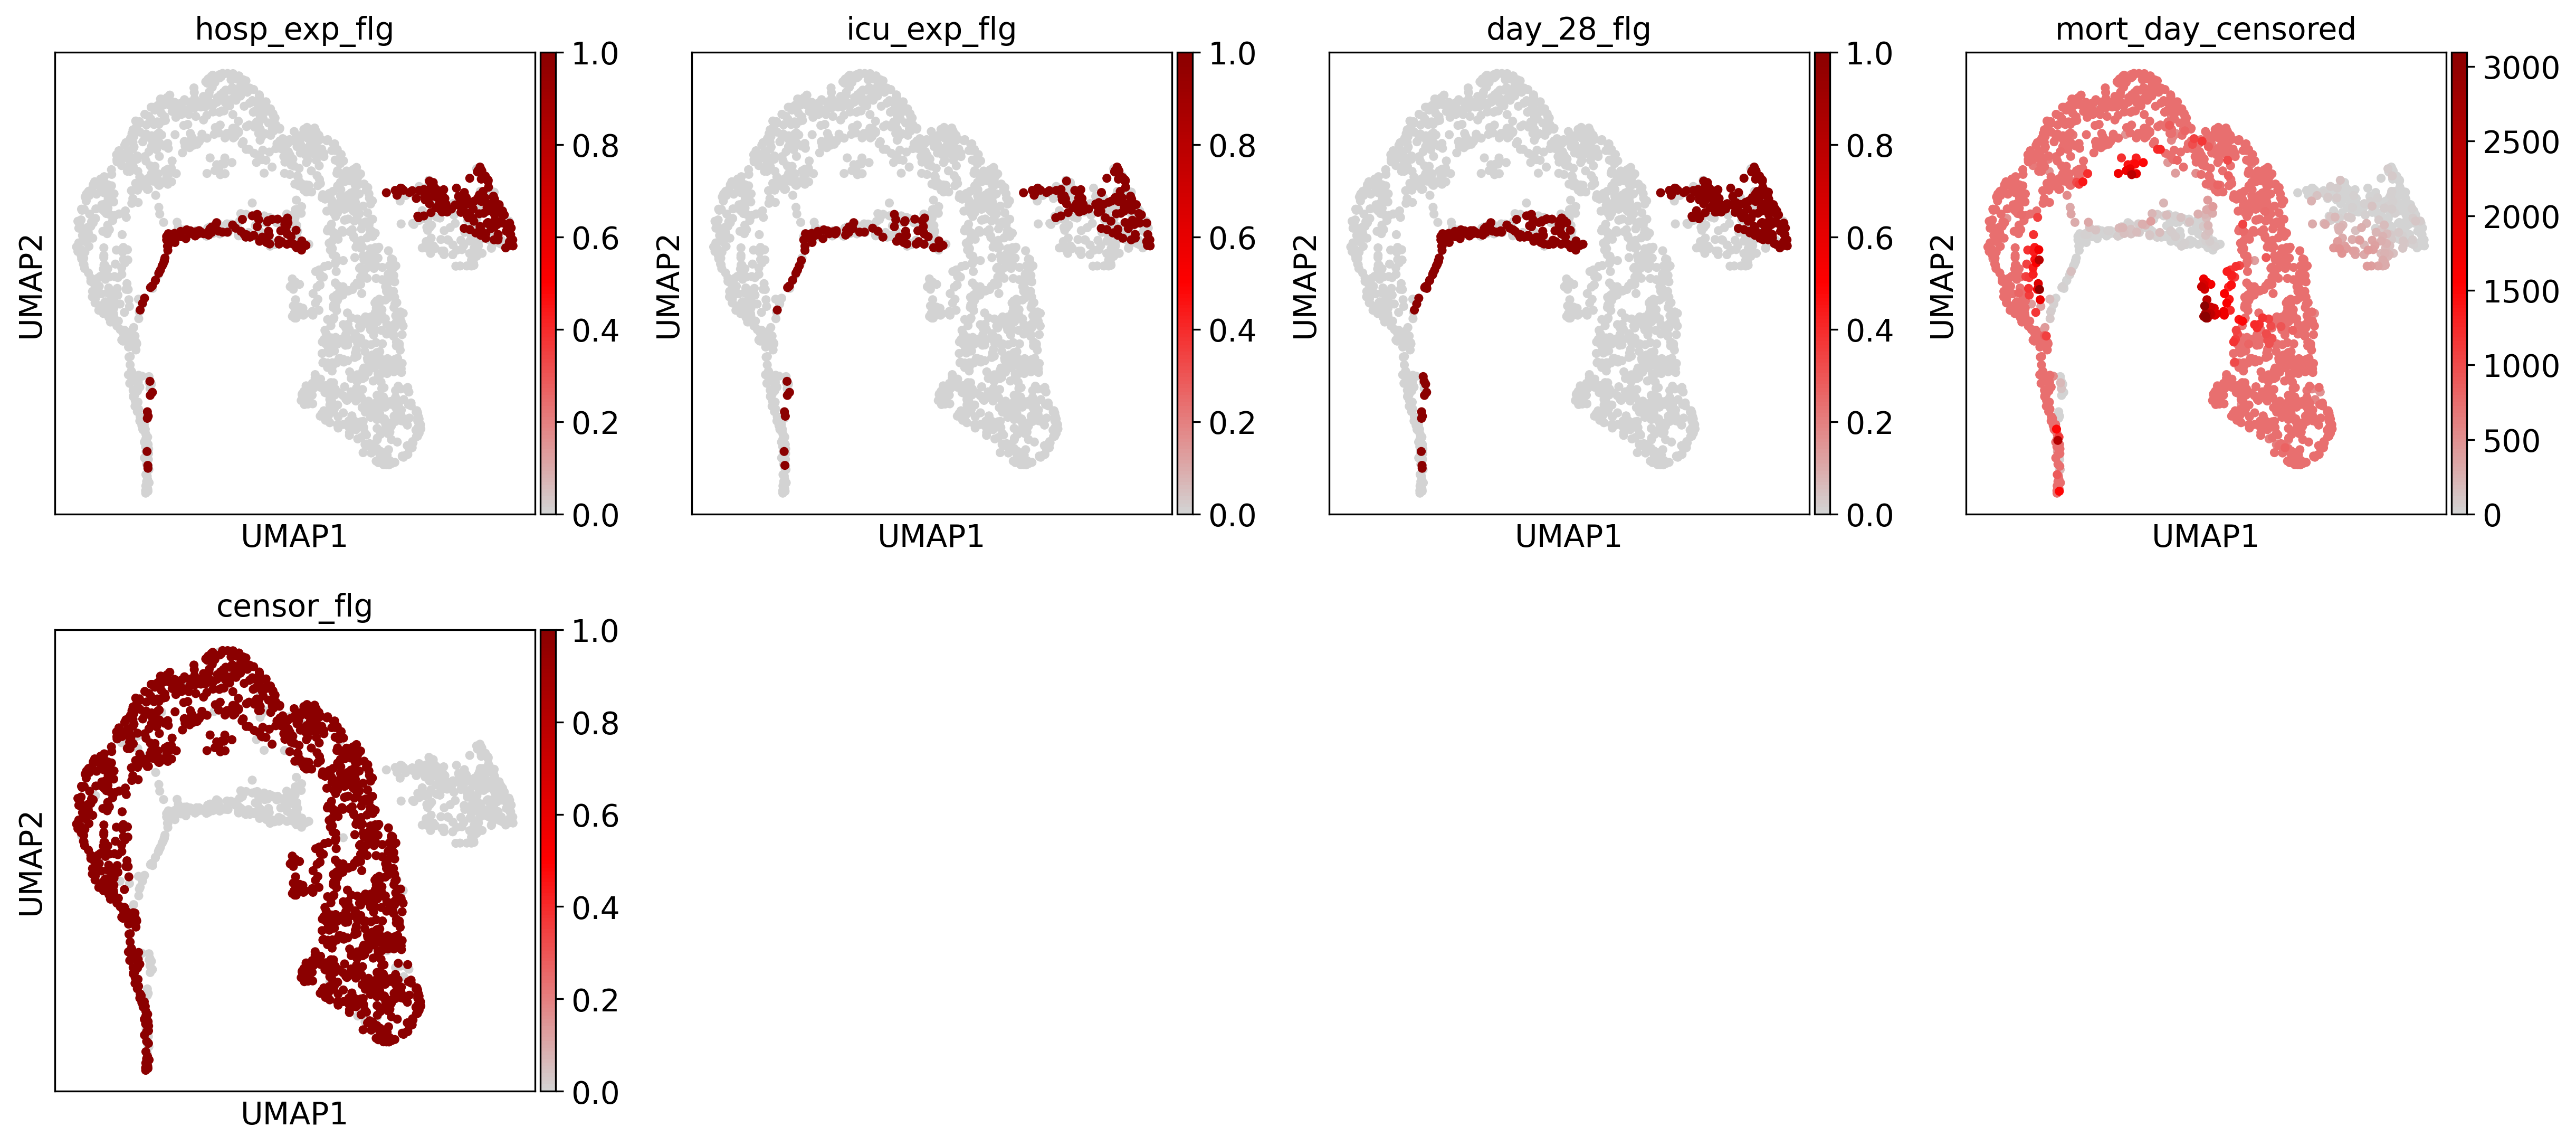

In [23]:
ep.pl.umap(
    adata,
    color=[
        "hosp_exp_flg",
        "icu_exp_flg",
        "day_28_flg",
        "mort_day_censored",
        "censor_flg",
    ],
    cmap=sct.plot.Colormaps.grey_red.value,
)

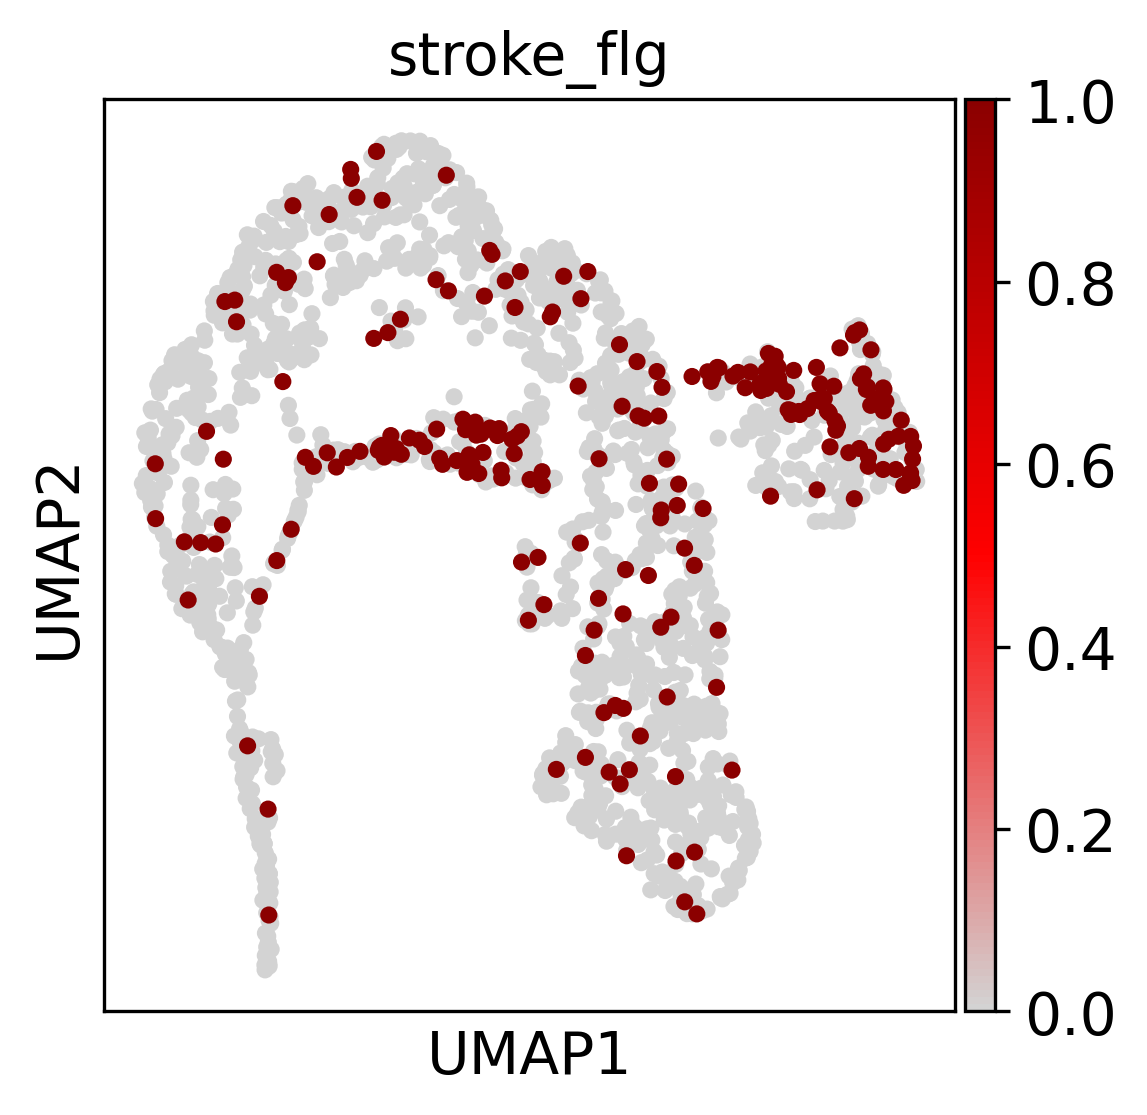

In [24]:
ep.pl.umap(adata, color="stroke_flg", cmap=sct.plot.Colormaps.grey_red.value)

In [25]:
ep.tl.paga(adata, groups="leiden_0_5")

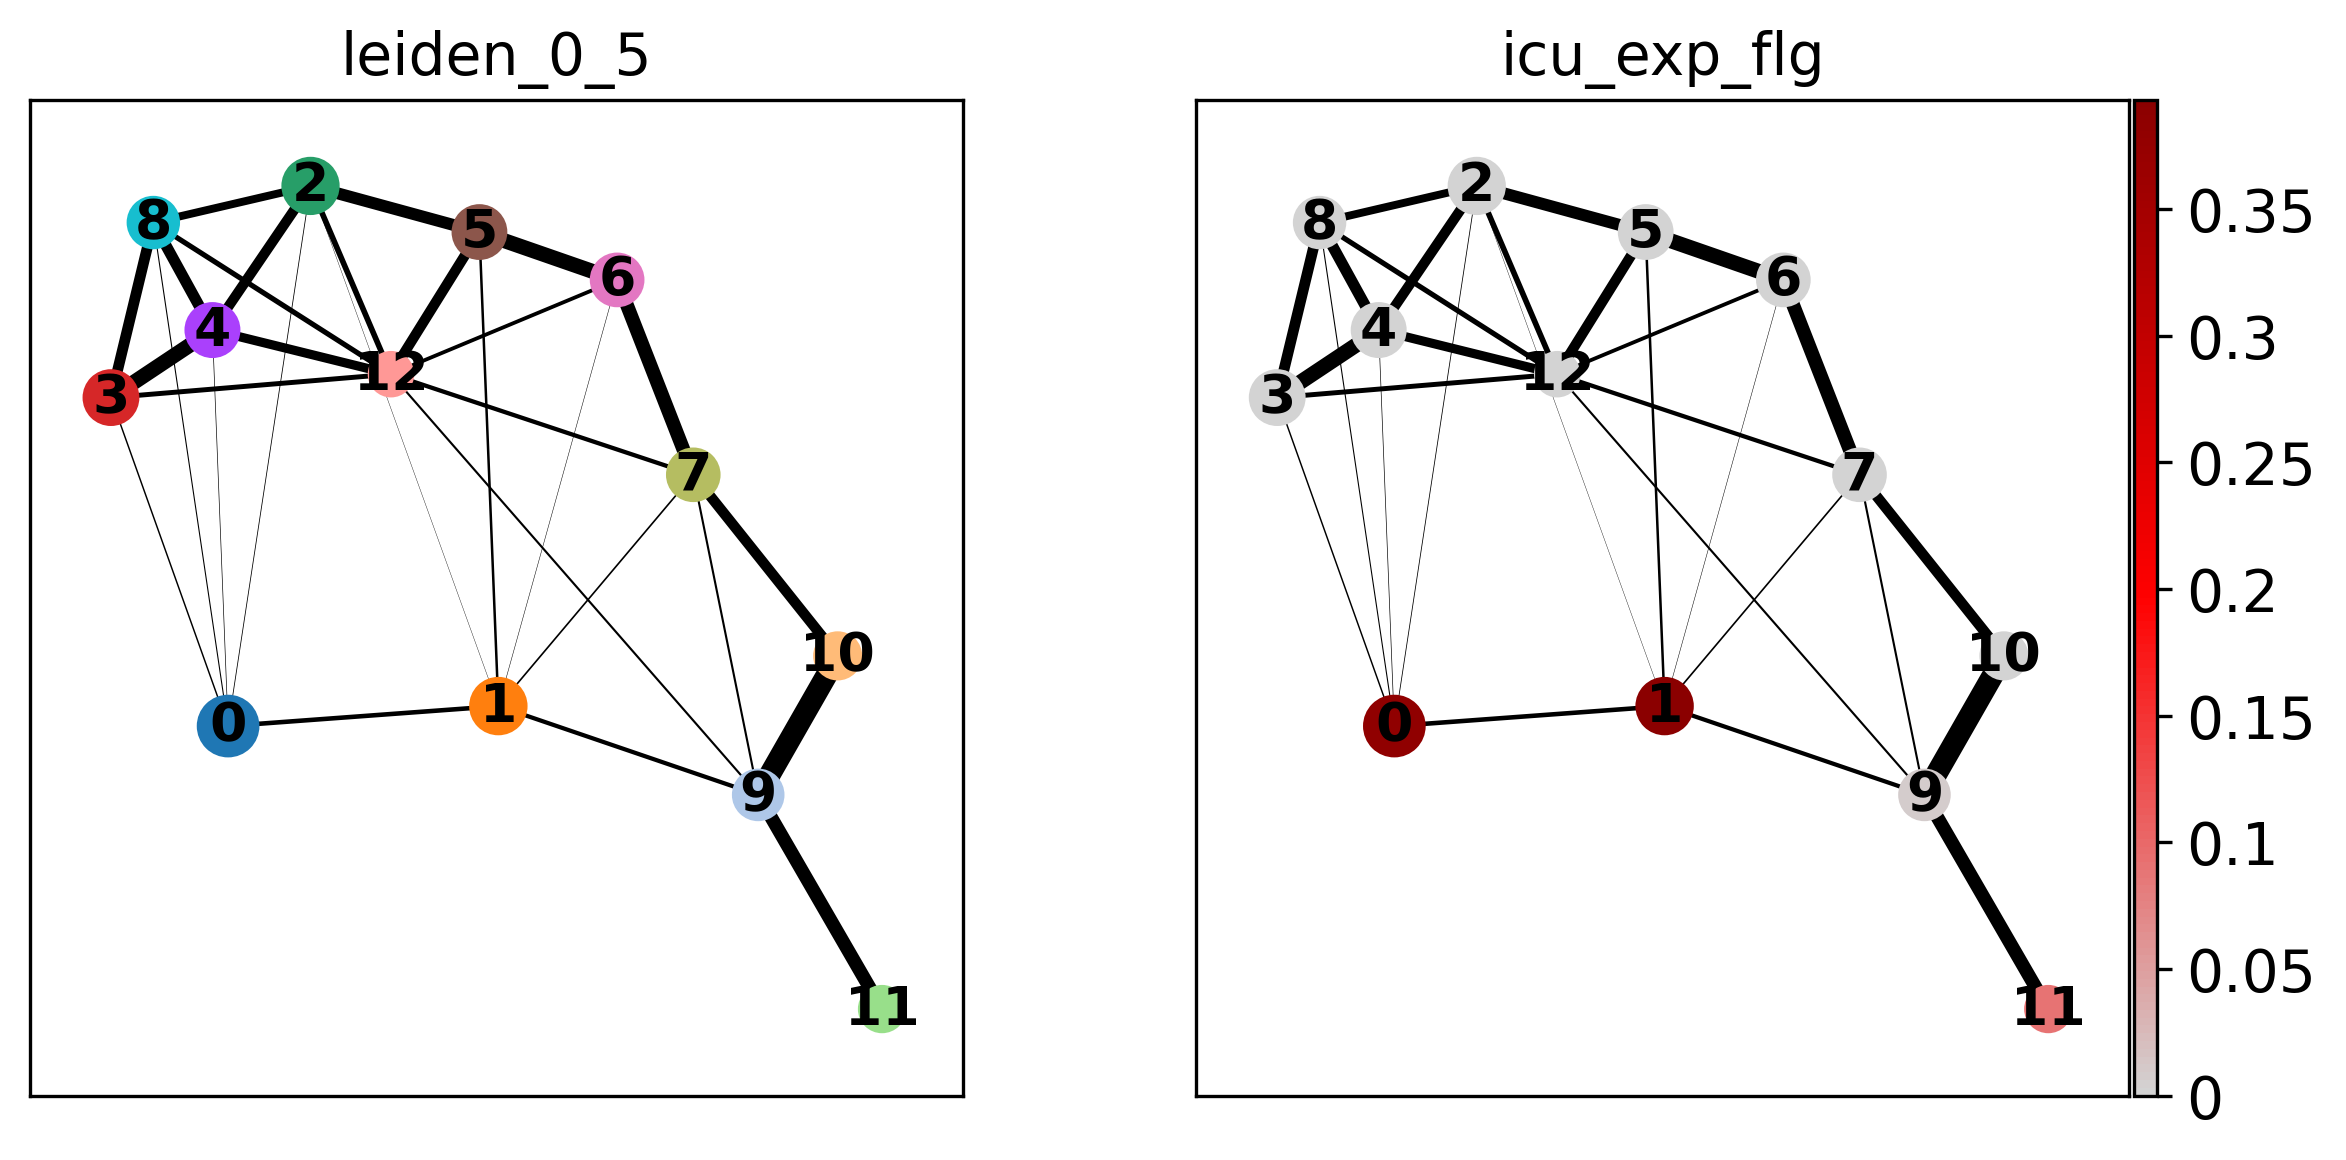

In [26]:
ep.pl.paga(
    adata, color=["leiden_0_5", "icu_exp_flg"], cmap=sct.plot.Colormaps.grey_red.value
)

In [27]:
ep.tl.draw_graph(adata, init_pos="paga")

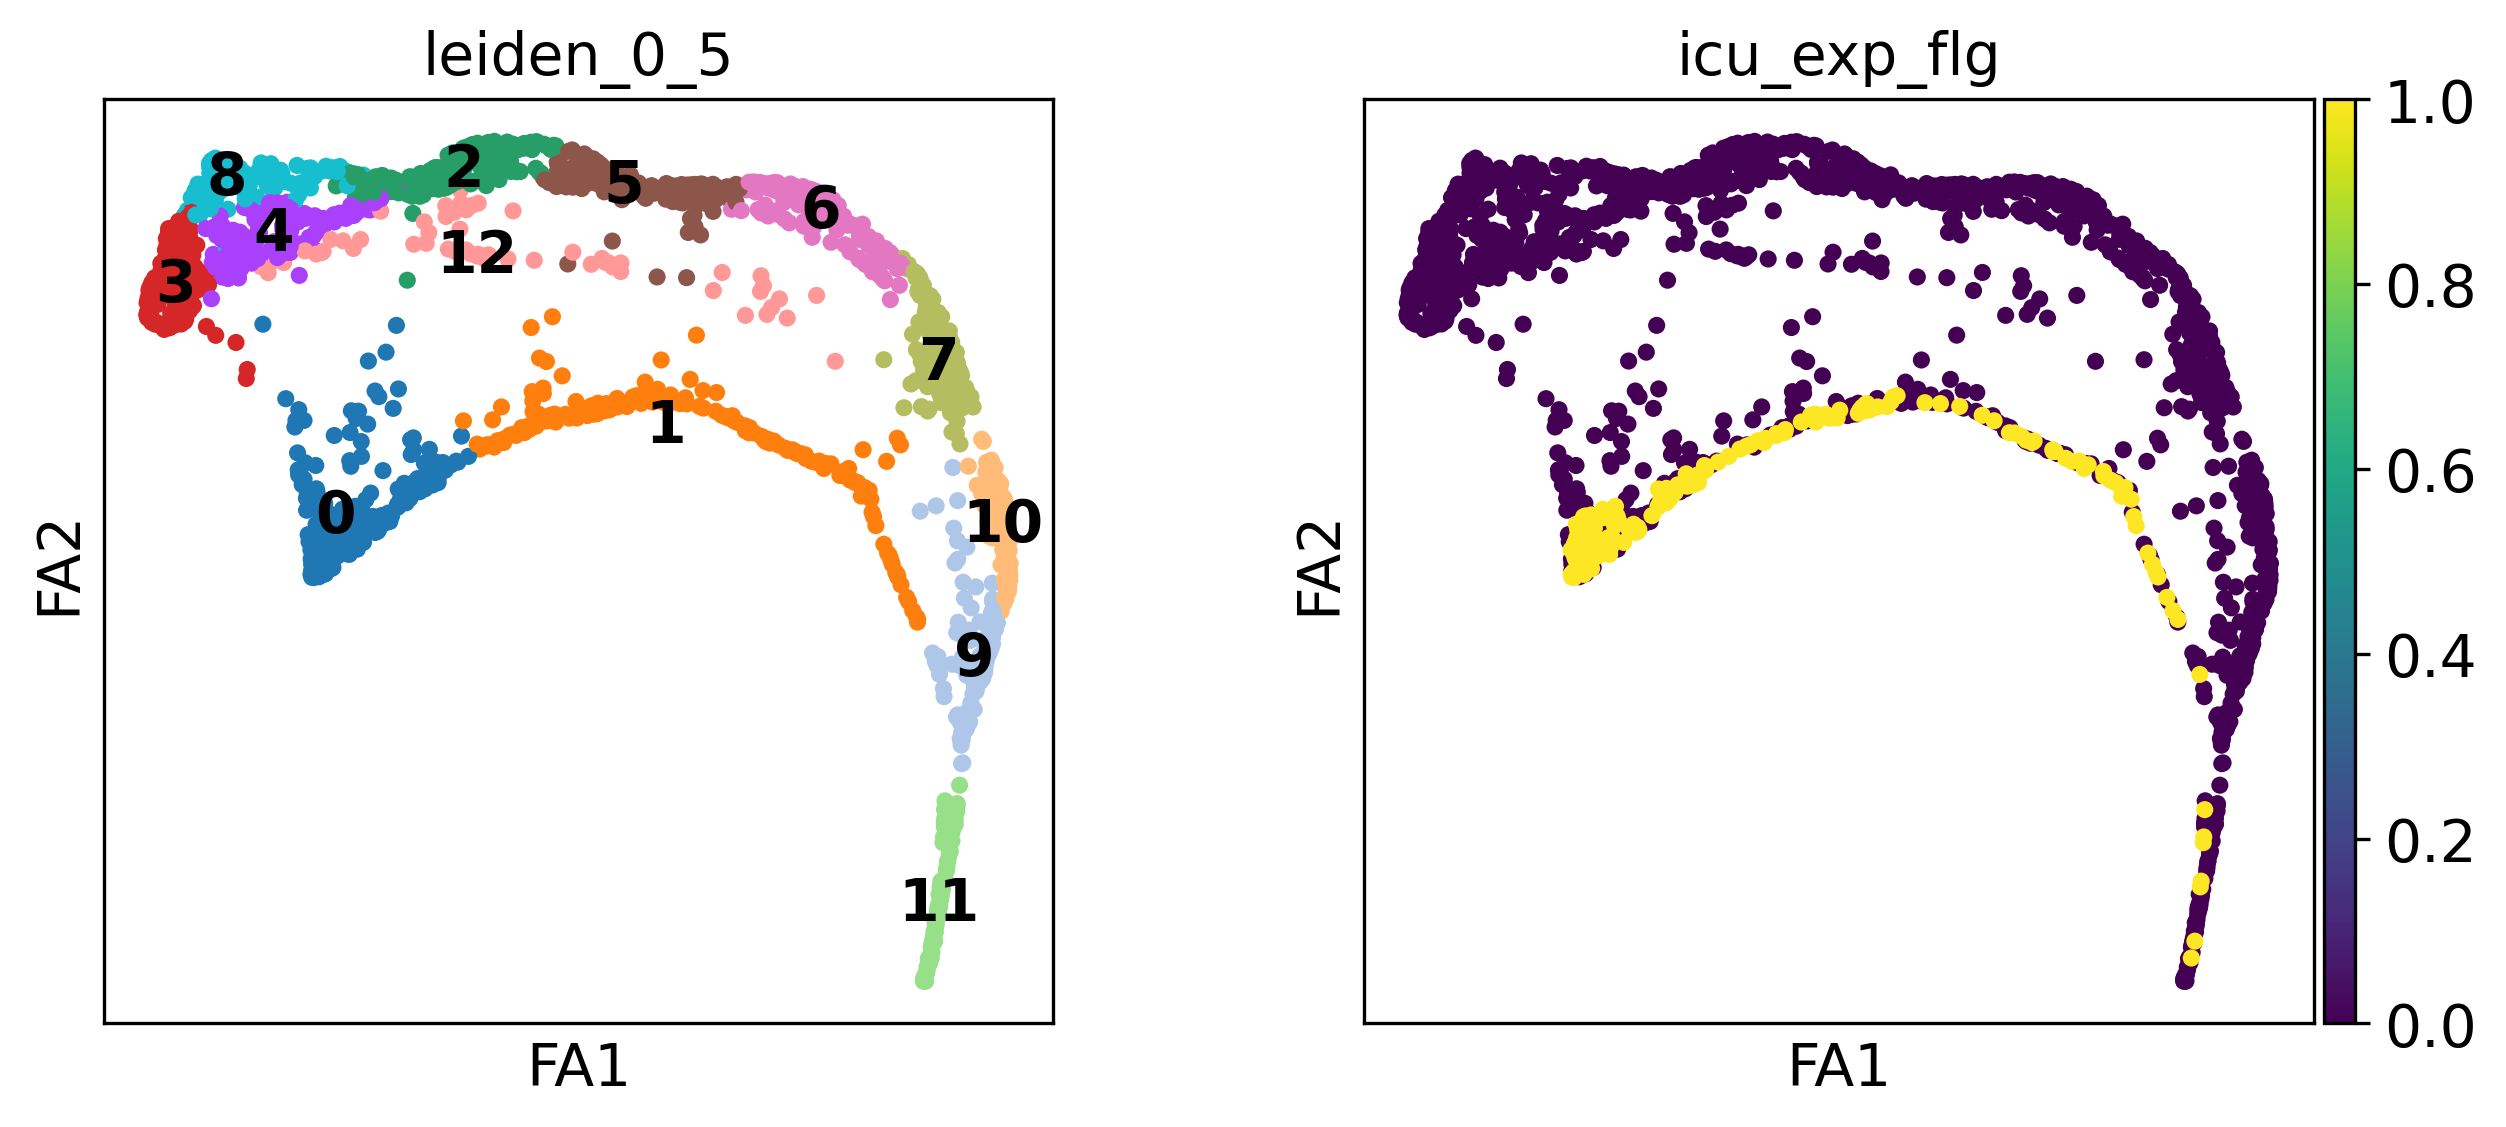

In [28]:
ep.pl.draw_graph(adata, color=["leiden_0_5", "icu_exp_flg"], legend_loc="on data")

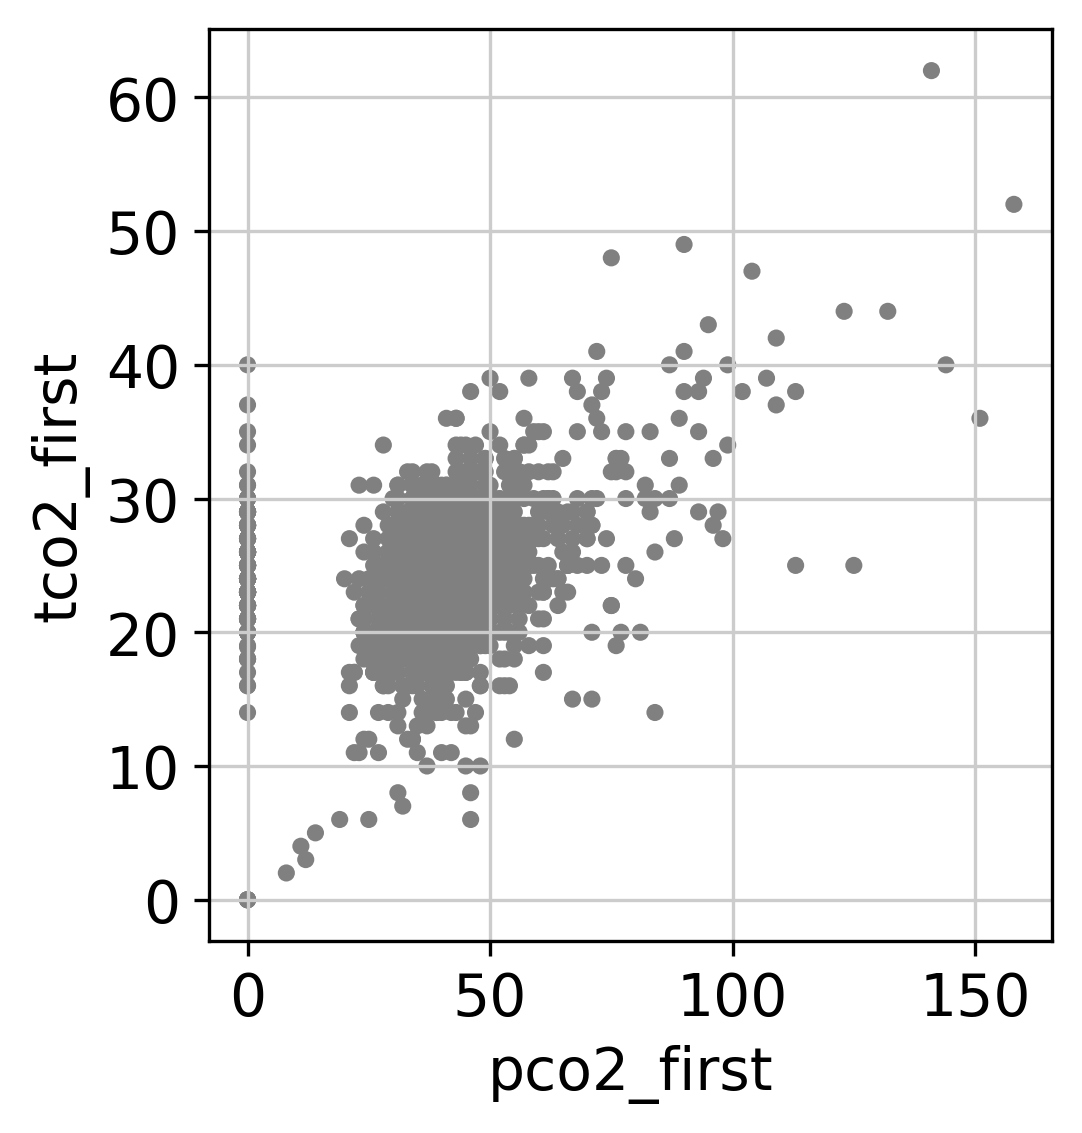

In [29]:
ep.pl.scatter(adata, "pco2_first", "tco2_first")